# ✈️ Aircraft Risk Analysis — Data Science Project

## 1. Business Understanding

### 📌 Project Overview
As part of its expansion strategy, our company is exploring entry into the aviation sector by acquiring aircraft for commercial and private use. However, the leadership team has limited knowledge of the operational and safety risks associated with different types of aircraft.

This project aims to leverage historical aviation accident data to help identify **which aircraft types pose the lowest risk**, enabling the business to make **data-driven decisions** about its initial investments.

### 🎯 Business Objective
The goal is to analyze patterns in aviation accidents from 1962 to 2023 to:
- Identify key factors contributing to aircraft risk,
- Determine which aircraft types are historically safest,
- Deliver **three concrete recommendations** for which aircraft the company should prioritize for purchase.

The final output will support the **head of the aviation division** with strategic insights to inform acquisition decisions.

---

## 2. Audience & Approach

This notebook is intended for a **technical data science audience** and outlines the full analytical process using Python and Markdown. The results will be presented separately in a non-technical format for business stakeholders.

### 👣 Project Steps:
1. **Data Understanding** — Explore and understand the dataset structure and content  
2. **Data Preparation** — Clean, transform, and engineer relevant features  
3. **Data Analysis** — Visualize trends, compare aircraft categories, and assess risk  
4. **Recommendations** — Deliver insights with business impact

All visualizations and conclusions are tied directly to the core business question:  
> *Which aircraft types are the lowest-risk investments for our company?*

---
---


   # 1. Data Understanding

In [1155]:
# First, we're going to import the necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numby

## 1.1. Exploring the Aircraft Accident Dataset
To begin our analysis, we first need to understand the structure and contents of the dataset. 
The aviation accident data comes from the National Transportation Safety Board (NTSB) and includes over 90,000 records from 1962 to 2023. Each row represents an aviation event, with details ranging from the event date and location to aircraft specifications, injuries, weather, and flight purpose.

Below is the first step: loading the dataset and inspecting its columns, types, and missing values.

In [1156]:
# import the dataset
path = './data/Aviation_Data.csv'
aviation_data = pd.read_csv(path, dtype='str')

# display basic info
aviation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      90348 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50132 non-null  object
 9   Airport.Name            52704 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87507 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

In [1157]:
# display first few rows
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## ✳️ 1.2. Selected Features for Risk Assessment

To conduct a meaningful and targeted analysis, the following features were selected from the dataset. These variables are directly tied to **aircraft safety, accident outcomes**, and **operational conditions**, and are thus essential for deriving **actionable insights** for low-risk aircraft recommendations.

| Feature                        | Description                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------------------------|
| **Make & Model**              | Identify aircraft manufacturers and specific models with safer historical records.            |
| **Aircraft.Category**         | Filter aircraft by type to segment the analysis.                 |
| **Aircraft.damage**           | Indicates the extent of physical damage to the aircraft, used as a proxy for incident severity. |
| **Injury.Severity**           | Qualitative summary of injury outcomes.                   |
| **Total.Fatal.Injuries**      | Number of fatalities in an incident.                                                          |
| **Total.Serious.Injuries**    | Number of seriously injured individuals.                                                      |
| **Total.Minor.Injuries**      | Number of minor injuries sustained.                                                           |
| **Total.Uninjured**           | Count of people who were not injured, despite the accident.                                   |
| **Number.of.Engines**         | Single vs. multi-engine — for comparing their correlation with incident severity.             |
| **Engine.Type**               | Different engine technologies may present different risk profiles.                            |
| **Purpose.of.flight**         | Whether the flight was private, commercial, etc. — useful for contextual analysis. |
| **Weather.Condition**         | Understand how weather affects accident outcomes.                         |
| **Broad.phase.of.flight**     | Identify the riskiest phases.                                |
| **Amateur.Built**             | Filter out homebuilt aircraft which typically have higher risk profiles.                      |
| **Event.Date**                |                                                                                                |

> 🟢 **Rationale**: These features are most relevant to quantifying accident outcomes, understanding flight risk conditions, and analyzing aircraft specifications — all critical to evaluating **which aircraft types present the lowest operational risk**.


In [1158]:
# Select the relevant columns
selected_columns = [
    "Make",
    "Model",
    "Aircraft.Category",
    "Aircraft.damage",
    "Injury.Severity",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Number.of.Engines",
    "Engine.Type",
    "Purpose.of.flight",
    "Weather.Condition",
    "Broad.phase.of.flight",
    "Amateur.Built",
    "Event.Date"
]

# 2. Data Preparation

Before diving into analysis, it is crucial to prepare the dataset to ensure accuracy, consistency, and usability. This phase involves cleaning and transforming the raw data into a structured form that supports meaningful insights.

### Objectives of this Phase:
- Select only relevant columns related to aircraft safety and risk.
- Handle missing or inconsistent values appropriately.
- Convert data types where necessary.
- Standardize and normalize categorical fields to reduce redundancy.
- Remove duplicate or irrelevant entries.

The ultimate goal is to create a clean, reliable dataset that accurately reflects real-world safety patterns and is suitable for further exploration and modeling.


In [1159]:
# We'll use only the relevant colummns to reduce noise
aviation_data = aviation_data[selected_columns]

In [1160]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    88826 non-null  object
 1   Model                   88797 non-null  object
 2   Aircraft.Category       32287 non-null  object
 3   Aircraft.damage         85695 non-null  object
 4   Injury.Severity         87889 non-null  object
 5   Total.Fatal.Injuries    77488 non-null  object
 6   Total.Serious.Injuries  76379 non-null  object
 7   Total.Minor.Injuries    76956 non-null  object
 8   Total.Uninjured         82977 non-null  object
 9   Number.of.Engines       82805 non-null  object
 10  Engine.Type             81793 non-null  object
 11  Purpose.of.flight       82697 non-null  object
 12  Weather.Condition       84397 non-null  object
 13  Broad.phase.of.flight   61724 non-null  object
 14  Amateur.Built           88787 non-null  object
 15  Ev

In [1161]:
aviation_data.head()

,Make,Model,Aircraft.Category,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Amateur.Built,Event.Date
0,Stinson,108-3,NaN,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Cruise,No,1948-10-24
1,Piper,PA24-180,NaN,Destroyed,Fatal(4),4.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Unknown,No,1962-07-19
2,Cessna,172M,NaN,Destroyed,Fatal(3),3.0,NaN,NaN,NaN,1.0,Reciprocating,Personal,IMC,Cruise,No,1974-08-30
3,Rockwell,112,NaN,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1977-06-19
4,Cessna,501,NaN,Destroyed,Fatal(1),1.0,2.0,NaN,0.0,NaN,NaN,Personal,VMC,Approach,No,1979-08-02


### 2.1. Handling missing or inconsistent values

> <p>The dataFrame has over 90 000 records, as we can see the <b>'Aircraft.Category'</b> column contains 32,287 non-null values. It's better to remove this column as it contains too many null values.. </p>
> <p>We'll assume that the null values in columns containing numerical data are equal to their respective medians..
These columns are : 
1. **Total.Fatal.Injuries**
2. **Total.Serious.Injuries**
3. **Total.Minor.Injuries**
4. **Total.Uninjured**
5. **Number.of.Engines** </p>
> *We use the **median** to impute missing values in the injury and engine-related columns because these features are often **skewed** due to extreme outliers, and the median is more **robust** to such irregularities than the mean.*


In [1162]:
# Let's remove the 'Aircraft.Category'.
to_drop = "Aircraft.Category"
aviation_data.drop(to_drop, axis=1, inplace=True)

In [1163]:
aviation_data.columns

Index(['Make', 'Model', 'Aircraft.damage', 'Injury.Severity',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines',
       'Engine.Type', 'Purpose.of.flight', 'Weather.Condition',
       'Broad.phase.of.flight', 'Amateur.Built', 'Event.Date'],
      dtype='object')

### 2.2. Converting data types where necessary

<p>Before replacing the null values, let's convert the columns containing numerical values to their respective types.</p>

In [1164]:

"""
let's convert the columns containing numerical values to 'float' types and 
replace the null values for columns in 'numeric_col'.
"""

numeric_col = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Number.of.Engines'
]

for col in numeric_col:
    aviation_data[col] = aviation_data[col].astype(float)
    aviation_data[col] = aviation_data[col].fillna(aviation_data[col].median())


### 2.3. Handle missing values for categorical columns and remove all duplicate rows.
>To preserve the integrity of our dataset and avoid losing valuable records, we chose to **replace missing values** with a placeholder string: `NULL_V`. This approach was applied to selected **categorical columns** that are critical for our risk analysis but had a significant number of missing entries:

In [1165]:
# handle missing values for categorical columns
categorical_col = [
    'Broad.phase.of.flight',
    'Engine.Type',
    'Purpose.of.flight',
    'Weather.Condition',
    'Amateur.Built',
    'Injury.Severity',
    'Aircraft.damage' 
]
for col in categorical_col:
    aviation_data[col] = aviation_data[col].fillna('NULL_V')


In [1166]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88826 non-null  object 
 1   Model                   88797 non-null  object 
 2   Aircraft.damage         90348 non-null  object 
 3   Injury.Severity         90348 non-null  object 
 4   Total.Fatal.Injuries    90348 non-null  float64
 5   Total.Serious.Injuries  90348 non-null  float64
 6   Total.Minor.Injuries    90348 non-null  float64
 7   Total.Uninjured         90348 non-null  float64
 8   Number.of.Engines       90348 non-null  float64
 9   Engine.Type             90348 non-null  object 
 10  Purpose.of.flight       90348 non-null  object 
 11  Weather.Condition       90348 non-null  object 
 12  Broad.phase.of.flight   90348 non-null  object 
 13  Amateur.Built           90348 non-null  object 
 14  Event.Date              88889 non-null

> <p>For the <b>Make</b> and <b>Model</b> columns, we can't replace the missing values because these fields uniquely identify the aircraft's manufacturer and specific type. Any imputation, such as using a common value or placeholder, would introduce inaccurate information that could lead to false conclusions about which aircraft are safest. Since our goal is to assess risk by aircraft type, keeping only rows with known Make and Model ensures the reliability of our insights.</p>

In [1167]:
# let's drop all rows with missing and duplicates values 
aviation_data.drop_duplicates(inplace=True)
aviation_data.dropna(inplace=True)
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88666 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88666 non-null  object 
 1   Model                   88666 non-null  object 
 2   Aircraft.damage         88666 non-null  object 
 3   Injury.Severity         88666 non-null  object 
 4   Total.Fatal.Injuries    88666 non-null  float64
 5   Total.Serious.Injuries  88666 non-null  float64
 6   Total.Minor.Injuries    88666 non-null  float64
 7   Total.Uninjured         88666 non-null  float64
 8   Number.of.Engines       88666 non-null  float64
 9   Engine.Type             88666 non-null  object 
 10  Purpose.of.flight       88666 non-null  object 
 11  Weather.Condition       88666 non-null  object 
 12  Broad.phase.of.flight   88666 non-null  object 
 13  Amateur.Built           88666 non-null  object 
 14  Event.Date              88666 non-null  obj

In [1168]:
aviation_data.head()

,Make,Model,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Amateur.Built,Event.Date
0,Stinson,108-3,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Cruise,No,1948-10-24
1,Piper,PA24-180,Destroyed,Fatal(4),4.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Unknown,No,1962-07-19
2,Cessna,172M,Destroyed,Fatal(3),3.0,0.0,0.0,1.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1974-08-30
3,Rockwell,112,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1977-06-19
4,Cessna,501,Destroyed,Fatal(1),1.0,2.0,0.0,0.0,1.0,NULL_V,Personal,VMC,Approach,No,1979-08-02


> To facilitate aircraft-specific risk analysis, we combined the **Make** and **Model** columns into a single **Aircraft.Type** column. This allows us to treat each unique aircraft configuration as a distinct entity for clearer comparison and aggregation.

In [1169]:
# Define the new column name for aircraft type
a_t_str = 'Aircraft.Type'

# Create 'Aircraft.Type' column by combining 'Make' and 'Model' with a separator
aviation_data[a_t_str] = aviation_data['Make'].str.strip() + " -- " + aviation_data['Model'].str.strip()

# Specify the columns to be removed after merging them into 'Aircraft.Type'
to_drop = ['Make', 'Model']

# Drop the 'Make' and 'Model' columns from the dataframe
aviation_data.drop(to_drop, axis=1, inplace=True)

# Remove the 'Aircraft.Type' column from its current position
a_t = aviation_data.pop(a_t_str)

# Insert the 'Aircraft.Type' column at the beginning of the dataframe for better readability
aviation_data.insert(0, a_t_str, a_t)

# Display the first few rows of the updated dataframe
aviation_data.head()

,Aircraft.Type,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Amateur.Built,Event.Date
0,Stinson -- 108-3,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Cruise,No,1948-10-24
1,Piper -- PA24-180,Destroyed,Fatal(4),4.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,UNK,Unknown,No,1962-07-19
2,Cessna -- 172M,Destroyed,Fatal(3),3.0,0.0,0.0,1.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1974-08-30
3,Rockwell -- 112,Destroyed,Fatal(2),2.0,0.0,0.0,0.0,1.0,Reciprocating,Personal,IMC,Cruise,No,1977-06-19
4,Cessna -- 501,Destroyed,Fatal(1),1.0,2.0,0.0,0.0,1.0,NULL_V,Personal,VMC,Approach,No,1979-08-02


In [1170]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88666 entries, 0 to 90347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.Type           88666 non-null  object 
 1   Aircraft.damage         88666 non-null  object 
 2   Injury.Severity         88666 non-null  object 
 3   Total.Fatal.Injuries    88666 non-null  float64
 4   Total.Serious.Injuries  88666 non-null  float64
 5   Total.Minor.Injuries    88666 non-null  float64
 6   Total.Uninjured         88666 non-null  float64
 7   Number.of.Engines       88666 non-null  float64
 8   Engine.Type             88666 non-null  object 
 9   Purpose.of.flight       88666 non-null  object 
 10  Weather.Condition       88666 non-null  object 
 11  Broad.phase.of.flight   88666 non-null  object 
 12  Amateur.Built           88666 non-null  object 
 13  Event.Date              88666 non-null  object 
dtypes: float64(5), object(9)
memory usage: 10.1

# 3. Data Analysis
In this phase, we explore the cleaned dataset to uncover patterns, trends, and key insights related to aircraft safety and accident risks, with the goal of identifying low-risk aircraft for business recommendations.

---
---
### Trend of Aircraft Incidents Over Time

To begin our analysis, we explore how aircraft incidents have evolved over the years. This helps us understand whether the overall risk has increased or decreased with time, and may also reveal patterns influenced by industry regulations, technological advancements, or operational changes.


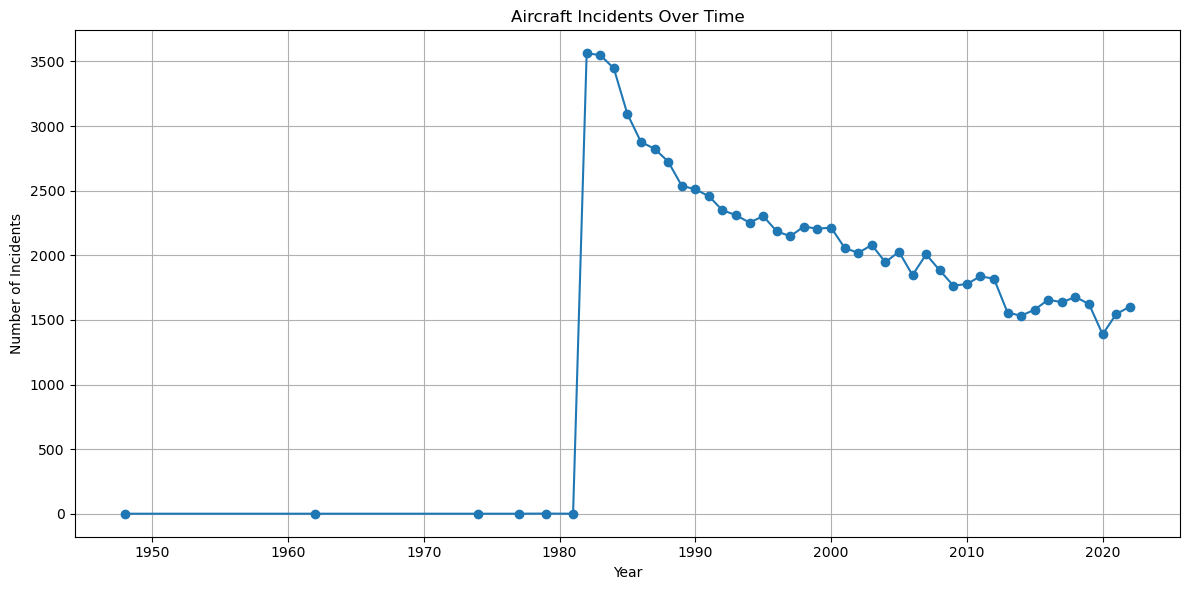

In [1171]:
# First let's convert our 'Event.Date' column to datetime format
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

# Extract year
aviation_data['year'] = aviation_data['Event.Date'].dt.year

# Count incidents per year
incidents_per_year = aviation_data['year'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(incidents_per_year.index, incidents_per_year.values, marker='o')
ax.set_title('Aircraft Incidents Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation:**

The graph above illustrates the trend of aircraft incidents over time. We can observe a clear decrease in the number of incidents as the years progress. The peak occurred around 1980, after which there has been a steady decline. This trend may suggest improvements in aviation technology, stricter safety regulations, and better training over the decades.


**Evolution of accident severity over time**
<p>To better understand the evolution of accident severity over time, I will now analyze the yearly trends for different types of injuries, including fatal, serious, minor, and uninjured cases.</p>



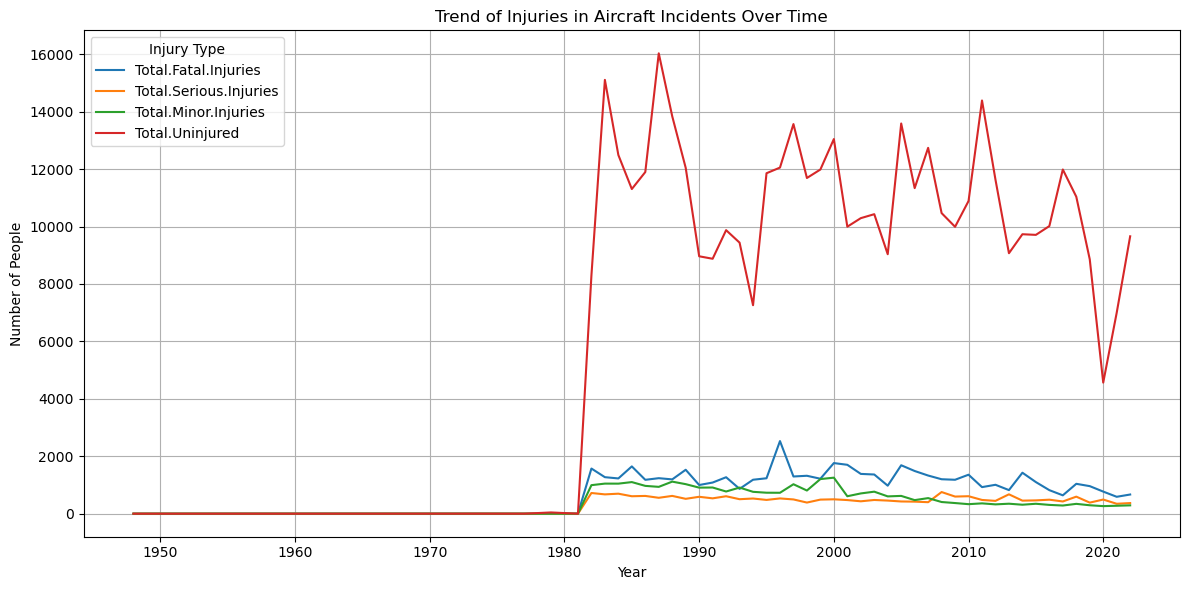

In [1172]:
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
group_by_year = aviation_data.groupby('year')[injury_cols].sum()
group_by_year.plot(figsize=(12, 6), kind='line')
plt.title('Trend of Injuries in Aircraft Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend(title='Injury Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**
<p>From the graph, we can observe several key trends regarding injuries and uninjured cases over time:

- **Total Fatal Injuries** peaked between 1990 and 2000, followed by fluctuating numbers in the subsequent years. While the pattern is not strictly linear, a closer look reveals a general **downward trend**, indicating fewer fatal injuries over time.
- **Total Serious Injuries** and **Total Minor Injuries** follow a similar fluctuating pattern, with **serious injuries consistently lower than minor injuries**, and both showing signs of **gradual decline** after their respective peaks.
- **Total Uninjured** individuals peaked earlier, between **1980 and 1990**, and have since shown a **decreasing trend**, though with more noticeable year-to-year variation.

Overall, the graph suggests a **positive shift in aviation safety**, with a reduction in both fatal and non-fatal injuries over time. However, the decline in uninjured cases might reflect a general decrease in total incidents or improved reporting/classification practices.
</p>

### Analyze by purpose of flight
To better understand the operational context of the incidents, the following chart displays the distribution of accidents by the **purpose of flight**. This helps identify which types of operations—such as personal, instructional, or commercial—are more frequently involved in accidents, offering valuable insight into risk levels associated with flight intent.

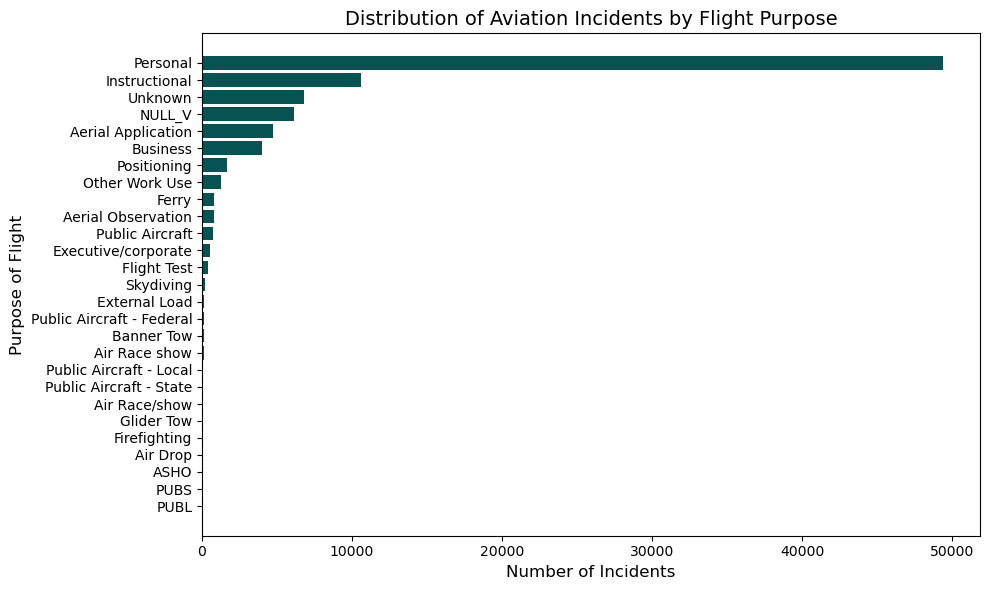

In [1173]:
# Count the number of occurrences for each flight purpose
purpose_of_flight = aviation_data['Purpose.of.flight'].value_counts()

# Sort the values in ascending order for better readability
purpose_of_flight = purpose_of_flight.sort_values()

# Set up the figure and axis with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Extract x (categories) and y (counts) for plotting
x = purpose_of_flight.index
y = purpose_of_flight.values

# Create a horizontal bar chart
ax.barh(x, y, color='#075252')

# Add axis labels and a title
ax.set_xlabel('Number of Incidents', fontsize=12)
ax.set_ylabel('Purpose of Flight', fontsize=12)
ax.set_title('Distribution of Aviation Incidents by Flight Purpose', fontsize=14)

# Optional: Improve layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


From the graph, we observe that **Personal flights** account for the highest number of incidents, followed by **Instructional**, **Aerial Application**, and **Business flights**. This indicates that non-commercial and training-related operations may carry higher risks or have less stringent safety measures compared to scheduled commercial flights.

It’s important to note that a significant portion of the data falls under **Unknown** and **NULL_V**, which represent missing or unreported values. Since we don’t have the actual purpose of those flights, they introduce uncertainty into the analysis and limit our ability to draw fully accurate conclusions about all categories.

### Analyze by broad phase of flight
Next, we analyze the distribution of incidents by the **broad phase of flight** to evaluate which stages (such as takeoff, cruise, and landing) are most prone to accidents. Although some values are missing and labeled as 'Unknown' or 'NULL_V', this graph will still provide valuable insights into the operational contexts that may influence risk.


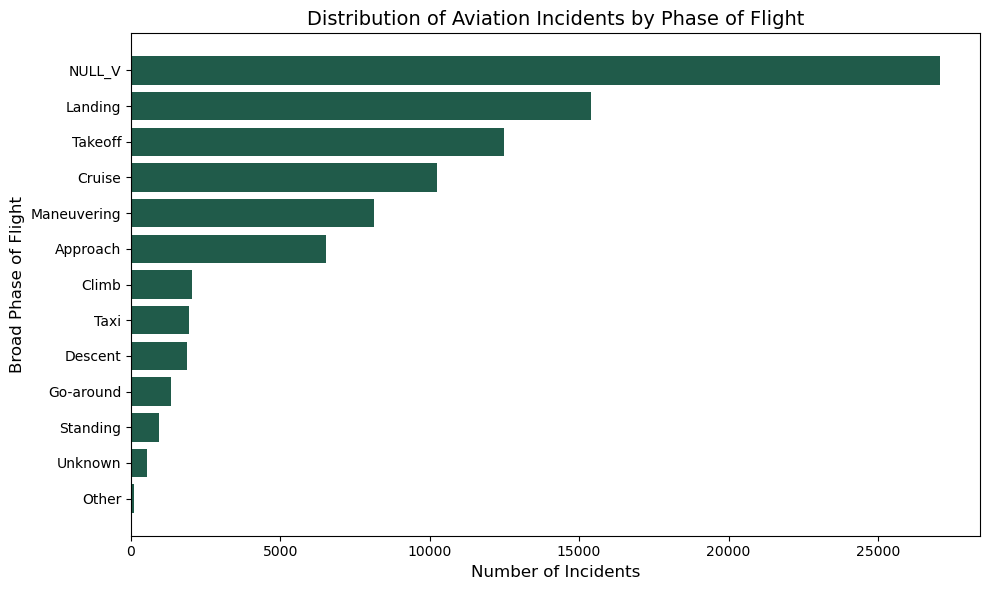

In [1174]:
# Count the number of occurrences for each phase
phase_of_flight = aviation_data['Broad.phase.of.flight'].value_counts()

# Sort the values in ascending order for better readability
phase_of_flight = phase_of_flight.sort_values()

# Set up the figure and axis with a custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Extract x (categories) and y (counts) for plotting
x = phase_of_flight.index
y = phase_of_flight.values

# Create a horizontal bar chart
ax.barh(x, y, color='#205B4A')

# Add axis labels and a title
ax.set_xlabel('Number of Incidents', fontsize=12)
ax.set_ylabel('Broad Phase of Flight', fontsize=12)
ax.set_title('Distribution of Aviation Incidents by Phase of Flight', fontsize=14)

# Optional: Improve layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


<b>**Interpretation**</b>

The majority of records in the **Broad phase of flight** column are labeled as **`NULL_V`**, indicating missing or unreported data. However, among the known values, the **landing** phase shows the highest number of incidents, followed by **takeoff**, **cruise**, **maneuvering**, **approach**, and **climb**. This suggests that critical phases like **landing** and **takeoff** are particularly prone to accidents, which aligns with general aviation safety research. These phases involve complex operations and rapid changes in aircraft configuration, speed, and altitude—factors that contribute to increased risk.

---

<p><b>Aircraft.damage distribution</b></p>

To better understand the impact of aviation incidents, I visualize the **Aircraft.damage** distribution using a pie chart. This helps identify how often accidents result in **minor**, **substantial**, or **destroyed** aircraft, while also accounting for **unknown** and missing (**NULL_V**) values.


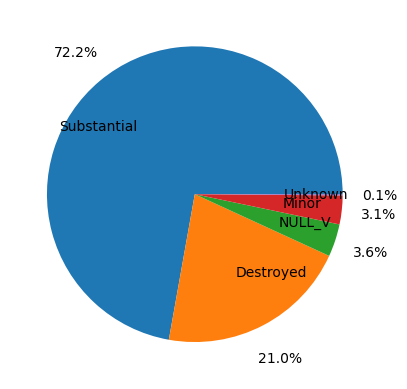

In [1175]:
aircraft_damage = aviation_data['Aircraft.damage'].value_counts()
fig, ax = plt.subplots()
x = aircraft_damage.values
y = aircraft_damage.index
ax.pie(x, labels=y, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.show()

<p><b>Interpretation</b></p>

The pie chart shows that the majority of recorded aviation incidents (about **72.2%**) result in **substantial damage** to the aircraft, indicating a significant but not total loss. **Destroyed aircraft** account for **21%** of the cases, which represents the most severe outcomes. Only **3.1%** of incidents involved **minor damage**, suggesting that low-severity accidents are relatively rare or underreported. Additionally, **3.6%** of the data is labeled as **NULL_V** (missing), and **0.1%** is **unknown**, which highlights the importance of considering data quality and completeness in the analysis.
